[CNN CUSTOM DATASET + MODEL ]

- 사용자 정의 이미지 데이터셋 생성 => ImageFolder
- 사용자 정의 CNN 기반 모델
- 데이터 : 강아지, 고양이 사진 

In [42]:
# 모듈 로딩
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import ImageFolder      # 이미지용 데이터셋 생성
from torch.utils.data import DataLoader           # 데이터로더
from torchvision.transforms import transforms     # 이미지 전처리 및 증강 모듈 

import matplotlib.pyplot as plt

In [43]:
# 데이터 준비 
IMG_ROOT = '../D0402/cat_dog/'

In [44]:
# 이미지 전처리 및 변형
# resize : 이미지 크기 통일                -> transforms.Resize((shape))
# tensor화 : Pytorch 모델 입력 타입 변환   -> transforms.ToTensor() : 텐서화 + 정규화(0.~1.)
preprocessing = transforms.Compose([transforms.Resize((100,100)),
                                    transforms.ToTensor()])

In [45]:
# 이미지 데이터 로딩
imgDS = ImageFolder(root=IMG_ROOT, transform=preprocessing)

In [46]:
# 데이터셋 체크
# - 타입
print(f'타입 : {type(imgDS)}')

# - 속성 : 클래스 정보
print(f'클래스 : {imgDS.classes}')
print(f'클래스 인덱스 : {imgDS.class_to_idx}')

# - 속성 : 데이터와 타겟
print(f'타겟 : {imgDS.targets}')
print(f'경로 : {imgDS.imgs}')

타입 : <class 'torchvision.datasets.folder.ImageFolder'>
클래스 : ['cat', 'dog']
클래스 인덱스 : {'cat': 0, 'dog': 1}
타겟 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<class 'torch.Tensor'> tensor(0.) tensor(0.7216)


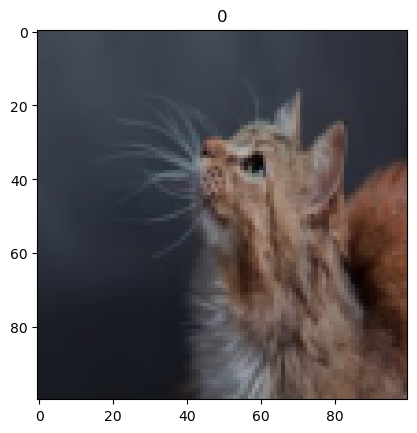

In [47]:
# 내부적으로 __getitem__() 호출되면서 이미지 데이터와 타겟 반환
rawIMG, target = imgDS[70]

# max, min 확인
print(type(rawIMG), rawIMG.min(), rawIMG.max())

# 텐서 그림으로 나타내기 위해 축 변경 (채널, 높이, 너비) -> (높이, 너비, 채널)
plt.imshow(rawIMG.permute(1,2,0))
plt.title(target)
plt.show()

In [48]:
from collections import Counter

class_counts = Counter(imgDS.targets)
class_counts

Counter({1: 570, 0: 450})

In [ ]:
# 회귀일때, 
# tds, vds, tds = random_split(imgDS, [tds,vds,tds], generator =torch.Generator().manual_seed(42))

In [ ]:
target = imgDS.targets

train_in, valid_in = train_test_split(range(len(imgDS,targets), testsize 0.2
                                            stratify - targets))
trainds = subset(imgds, train_in) ....

traindl = DataLoader(trainds,shuffle=True) ..... 


In [49]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Subset

from sklearn.model_selection import train_test_split

# 데이터 및 라벨 추출
data = torch.stack([imgDS[i][0] for i in range(len(imgDS))])  # 이미지 텐서 변환
labels = torch.tensor([imgDS[i][1] for i in range(len(imgDS))], dtype=torch.long)  # 라벨 변환

# train_test_split 적용
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, stratify=labels, random_state=42
)

# 데이터셋 생성
trainDS = TensorDataset(train_data, train_labels)
testDS = TensorDataset(test_data, test_labels)

# DataLoader 생성
train_DL = DataLoader(trainDS, batch_size=32, shuffle=True)
test_DL = DataLoader(testDS, batch_size=32, shuffle=False)


In [50]:
# 학습 관련 설정
EPOCHS = 10
BATCH_SIZE = 100
ITERATION = int(len(trainDS) / BATCH_SIZE)
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'DEVICE = {DEVICE}')

DEVICE = cpu


In [51]:
# 특징 추출 : 입력 이미지 주요 특징 추출한 특징맵 FeatureMap
#             이미지 채널 / 커널 수      출력 채널 / 커널 수      커널 크기       패딩크기        스트라이드
# 합성곱층  :            3                       1                  3             0               1
#                   커널 크기               스트라이드
# 풀 링 층  :           2                        2              다운샘플링 : 과적합 방지 (Max, Average)
# 플 랫 층  :  ---------------------------------------------------------------------------------------------
    
# 전결합학습 : 추출된 FeatureMap으로 학습 진행 
#             커널 수 * 높이 * 너비       출력 / 퍼셉트론 수 
# 은 닉 층  :       64 * 6 *6                  600
#                      600                     120
#                      120                     1

# class CDCNN(nn.Module):
    
#     def __init__(self):
#         super(CDCNN, self).__init__()
#         # 초기 레이어 : 큰 특성 맵을 유지해 다양한 패턴을 학습 -> Padding 사용(출력 크기 유지, 경계 정보 보존, 모델 설계 유연성)
#         self.layer1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
#                                     nn.BatchNorm2d(32),   # 평균과 분산을 이용한 정규화 / out_channels와 동일 
#                                     nn.ReLU(),            
#                                     nn.MaxPool2d(kernel_size=2, stride=2))    # Thanos!!!!! : 보통 절반으로 줄이기 때문에 ks, strides 같은 경우 많음 
#         # 후속 레이어 : 특성 맵의 크기를 축소하며 더 세밀한 정보를 추출 
#         self.layer2 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
#                                     nn.BatchNorm2d(64),
#                                     nn.ReLU(),
#                                     nn.MaxPool2d(2))      # 약식 표기 : stride를 따로 설정하지 않으면 자동으로 kernel_size와 동일한 값으로 설정됨 
#         self.fc1 = nn.Linear(in_features=64*24*24, out_features=600)  # 풀링한 결과가 소수점일 시, 소수점 이하를 버림 
#         self.drop = nn.Dropout2d(0.25)
#         self.fc2 = nn.Linear(in_features=600, out_features=120)
#         self.fc3 = nn.Linear(in_features=120, out_features=1)
        
        
#     def forward(self,x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.view(out.size(0), -1)
#         out = self.fc1(out)
#         out = self.drop(out)
#         out = self.fc2(out)
#         out = self.fc3(out)
        
#         return out

class CDCNN(nn.Module):
    def __init__(self):
        super(CDCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # 동적 계산을 위해 Adaptive Pooling 활용
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc1 = nn.Linear(128, 600)
        self.drop = nn.Dropout(0.3)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)  # Flatten 처리
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # 출력 활성화 함수 적용
        return x


In [52]:
# 확인 
from torchinfo import summary
m1= CDCNN()
summary(m1, input_size=(1,3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
CDCNN                                    [1, 1]                    --
├─Sequential: 1-1                        [1, 32, 50, 50]           --
│    └─Conv2d: 2-1                       [1, 32, 100, 100]         896
│    └─BatchNorm2d: 2-2                  [1, 32, 100, 100]         64
│    └─ReLU: 2-3                         [1, 32, 100, 100]         --
│    └─MaxPool2d: 2-4                    [1, 32, 50, 50]           --
├─Sequential: 1-2                        [1, 64, 25, 25]           --
│    └─Conv2d: 2-5                       [1, 64, 50, 50]           18,496
│    └─BatchNorm2d: 2-6                  [1, 64, 50, 50]           128
│    └─ReLU: 2-7                         [1, 64, 50, 50]           --
│    └─MaxPool2d: 2-8                    [1, 64, 25, 25]           --
├─Sequential: 1-3                        [1, 128, 12, 12]          --
│    └─Conv2d: 2-9                       [1, 128, 25, 25]          73,856
│    

In [53]:
# 학습 관련 인스턴스들 
import torch.optim as optim
LR = 0.001
model = CDCNN()               # 학습 모델
OPTIMIZER = optim.Adam(model.parameters(),lr=LR)   # 최적화, 즉 경사하강법 알고리즘으로 W,b의 값 갱신 
LOSS_FN = nn.BCELoss()       

In [54]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim      # 최적화 모듈 

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader        ## 학습 데이터셋 관련 모듈
import torchmetrics.functional as mt
from torchmetrics.classification import *  # 분류 

from torchmetrics.classification import BinaryAccuracy


In [55]:
def training():
    # 학습 모드 설정
    model.train()

    E_LOSS, E_ACC = 0, 0
    
    for feature, target in train_DL:  
        # 가중치 기울기 0 초기화
        OPTIMIZER.zero_grad()

        # 학습 진행
        pre_y = model(feature)
        
        # 손실 계산
        loss = LOSS_FN(pre_y, target.reshape(-1, 1).float())
        
        # 정확도 계산
        Accuracy = BinaryAccuracy()
        acc = Accuracy(pre_y, target.reshape(-1, 1).float())
        
        # 역전파 진행
        loss.backward()

        # 가중치/절편 업데이트
        OPTIMIZER.step()

        # 손실 및 정확도 누적
        E_LOSS += loss.item()
        E_ACC += acc.item()

    # 평균 손실 및 정확도 반환
    return E_LOSS / len(train_DL), E_ACC / len(train_DL)


In [56]:
# [6-3] 검증 함수
# - 검증용 데이터셋으로 모델 검증
# - 학습 지속여부 결정 기준이 됨

def evaluate():
    # 에포크 단위로 검증 => 검증 모드
    model.eval()
    
    # W, b가 업데이트 되지 않도록 설정
    with torch.no_grad():
        T_LOSS, T_ACC, CNT = 0, 0, 0
        for feature, target in test_DL:
            # 모델 예측값 계산
            pre_y = model(feature)
            
            # 손실 계산
            loss = LOSS_FN(pre_y, target.reshape(-1, 1).float())
            
            # 정확도 계산
            Accuracy = BinaryAccuracy()
            acc = Accuracy(pre_y, target.reshape(-1, 1).float())
            
            # Loss와 정확도 누적
            T_LOSS += loss.item()
            T_ACC += acc.item()
            CNT += 1
        
        # 평균 Loss와 정확도 반환
        return T_LOSS / CNT, T_ACC / CNT


In [57]:
# 에포크 : DS 처음부터 ~ 끝까지 학습
HIST = {'Train':[], 'Valid':[]}   

# 에포크 단위 학습/검증 진행 
for epoch in range(EPOCHS):
    trainLoss, trainacc = training()
    validLoss, validacc = evaluate()

    HIST['Train'].append((trainLoss,trainacc))
    HIST['Valid'].append((validLoss,validacc))

    print(f'\nEPOCH[{epoch+1}/{EPOCHS}]----------------')
    print(f'- TRAIN_LOSS {trainLoss:.5f}')
    print(f'- VALID_LOSS {validLoss:.5f}')
    print('-------------------------------')
    print(f'- TRAIN_Accuracy {trainacc:.5f}')
    print(f'- VALID_Accuracy {validacc:.5f}')


EPOCH[1/10]----------------
- TRAIN_LOSS 0.67023
- VALID_LOSS 0.84682
-------------------------------
- TRAIN_Accuracy 0.57332
- VALID_Accuracy 0.57589

EPOCH[2/10]----------------
- TRAIN_LOSS 0.61939
- VALID_LOSS 0.69327
-------------------------------
- TRAIN_Accuracy 0.65264
- VALID_Accuracy 0.49851

EPOCH[3/10]----------------
- TRAIN_LOSS 0.58823
- VALID_LOSS 0.60802
-------------------------------
- TRAIN_Accuracy 0.68510
- VALID_Accuracy 0.61607

EPOCH[4/10]----------------
- TRAIN_LOSS 0.52777
- VALID_LOSS 0.52053
-------------------------------
- TRAIN_Accuracy 0.71394
- VALID_Accuracy 0.74851

EPOCH[5/10]----------------
- TRAIN_LOSS 0.46359
- VALID_LOSS 0.45283
-------------------------------
- TRAIN_Accuracy 0.77764
- VALID_Accuracy 0.77083

EPOCH[6/10]----------------
- TRAIN_LOSS 0.40364
- VALID_LOSS 1.74862
-------------------------------
- TRAIN_Accuracy 0.82452
- VALID_Accuracy 0.45089

EPOCH[7/10]----------------
- TRAIN_LOSS 0.39999
- VALID_LOSS 0.29810
-----------